In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 7 - Natural Language Processing/Section 36 - Natural Language Processing/Python/Restaurant_Reviews.tsv", delimiter='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.isna().sum()

Review    0
Liked     0
dtype: int64

In [5]:
df.duplicated().sum()

4

In [6]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(996, 2)

In [7]:
df.reset_index(inplace=True)
df.head()

,index,Review,Liked
0,0,Wow... Loved this place.,1
1,1,Crust is not good.,0
2,2,Not tasty and the texture was just nasty.,0
3,3,Stopped by during the late May bank holiday of...,1
4,4,The selection on the menu was great and so wer...,1


In [8]:
df['Liked'].value_counts()

1    499
0    497
Name: Liked, dtype: int64

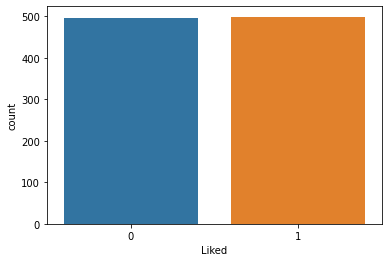

In [9]:
sns.countplot(x = df['Liked'])

In [10]:
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
stop_words = stopwords.words('english')
stop_words.remove('not')
ps = PorterStemmer()

corpus = []
for i in range(0, len(df)):
  reviews = re.sub('[^ a-zA-Z]', ' ', df['Review'][i])
  reviews = reviews.lower()
  reviews = reviews.split()

  reviews = [ps.stem(word) for word in reviews if word not in stop_words]
  reviews = " ".join(reviews)
  corpus.append(reviews)
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

In [12]:
from keras.layers import LSTM, Embedding, Bidirectional
from keras import layers
from keras import models
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

In [31]:
vocab_size = 5000
 
one_hot_reviews = [one_hot(review, vocab_size) for review in corpus]
one_hot_reviews

[[4330, 2768, 2335],
 [4063, 3360, 3212],
 [3360, 2258, 2823, 3987],
 [1504, 4547, 4622, 3357, 1158, 2669, 170, 4884, 2768],
 [2535, 954, 1549, 1787],
 [3912, 2123, 2324, 38, 3280],
 [3900, 651, 1467],
 [3818, 336, 125, 966, 4534, 3, 1224, 359, 3916, 3695],
 [3697, 1549],
 [1549, 1763],
 [4207, 3681],
 [2062, 3360, 1278, 2179],
 [3561, 1892, 4134, 1108, 713, 3270, 100, 1295],
 [4129, 1967, 2952, 2224, 3871, 865, 2433],
 [2992, 4567, 4727, 1715, 1243],
 [1770, 988, 3663, 4955],
 [2203, 4884],
 [1894, 2502, 3518, 4207],
 [2335, 3360, 4325, 359, 4901, 3348, 1015],
 [3360, 336],
 [2558, 981],
 [4765, 1944],
 [4207, 859, 3593],
 [966, 1892, 3164, 2931, 3805],
 [1474],
 [4814, 1955, 4694, 2284, 1133, 2234, 3212],
 [1177, 2938, 2424, 729],
 [2909, 593, 1549, 2796, 2636, 1645, 4855, 1037],
 [2991,
  2952,
  3912,
  4765,
  196,
  1620,
  4765,
  2219,
  3365,
  1296,
  772,
  3695,
  336,
  3935,
  3107],
 [1215, 883, 2464],
 [859, 405, 336, 4350, 3697, 2450, 4703, 225],
 [336, 659, 2586],
 [2

In [29]:
leng = [len(j) for j in one_hot_reviews]
max(leng)

20

In [27]:
max_length = 20

padded_reviews = pad_sequences(one_hot_reviews, padding='post', maxlen=max_length)
padded_reviews

array([[4330, 2768, 2335, ...,    0,    0,    0],
       [4063, 3360, 3212, ...,    0,    0,    0],
       [3360, 2258, 2823, ...,    0,    0,    0],
       ...,
       [1259, 3360, 3511, ...,    0,    0,    0],
       [ 959, 4214, 2932, ...,    0,    0,    0],
       [1801, 4818, 2485, ...,    0,    0,    0]], dtype=int32)

In [32]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(padded_reviews, 
                                                    df['Liked'], 
                                                    test_size=0.3, 
                                                    random_state=42)
x_train.shape, x_test.shape

((697, 20), (299, 20))

In [17]:
feature_size = 8

model = models.Sequential()
model.add(Embedding(vocab_size, feature_size, input_length=max_length))
model.add(layers.Dropout(0.5))

model.add(Bidirectional(LSTM(units=100)))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             40000     
_________________________________________________________________
dropout (Dropout)            (None, 20, 8)             0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               87200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 127,401
Trainable params: 127,401
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['acc']
    )

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

filepath = "model.h5" 
check = ModelCheckpoint(filepath, 
                        monitor='val_acc', 
                        save_best_only=True, 
                        verbose=1)

early = EarlyStopping(monitor='val_acc', 
                      patience=5, 
                      verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                              patience=3, 
                              factor=0.2, 
                              min_delta=0.00001, 
                              verbose=1)

call_backs = [check, early, reduce_lr]

model_history = model.fit(
    x_train, 
    y_train, 
    validation_data=(x_test, y_test), 
    batch_size=8, 
    epochs=100,
    callbacks=call_backs
    )

Epoch 1/100
88/88 [==============================] - 7s 35ms/step - loss: 0.6934 - acc: 0.4845 - val_loss: 0.6910 - val_acc: 0.4916

Epoch 00001: val_acc improved from -inf to 0.49164, saving model to model.h5
Epoch 2/100
88/88 [==============================] - 2s 18ms/step - loss: 0.6880 - acc: 0.5453 - val_loss: 0.6686 - val_acc: 0.6054

Epoch 00002: val_acc improved from 0.49164 to 0.60535, saving model to model.h5
Epoch 3/100
88/88 [==============================] - 2s 19ms/step - loss: 0.5824 - acc: 0.7041 - val_loss: 0.4859 - val_acc: 0.7726

Epoch 00003: val_acc improved from 0.60535 to 0.77258, saving model to model.h5
Epoch 4/100
88/88 [==============================] - 2s 19ms/step - loss: 0.3167 - acc: 0.8743 - val_loss: 0.4838 - val_acc: 0.7759

Epoch 00004: val_acc improved from 0.77258 to 0.77592, saving model to model.h5
Epoch 5/100
88/88 [==============================] - 2s 19ms/step - loss: 0.2483 - acc: 0.9105 - val_loss: 0.6172 - val_acc: 0.7993

Epoch 00005: val_a

In [19]:
from keras.models import load_model
_model = load_model("model.h5")
_model.evaluate(x_test, y_test)

10/10 [==============================] - 1s 7ms/step - loss: 0.6172 - acc: 0.7993


[0.6172387599945068, 0.7993311285972595]

In [20]:
dr = pd.DataFrame(model_history.history)
dr[:5]

,loss,acc,val_loss,val_acc,lr
0,0.692601,0.505022,0.691023,0.491639,0.001
1,0.681206,0.599713,0.668586,0.605351,0.001
2,0.497092,0.773314,0.485882,0.772575,0.001
3,0.324904,0.868006,0.483768,0.775920,0.001
4,0.208689,0.931133,0.617239,0.799331,0.001


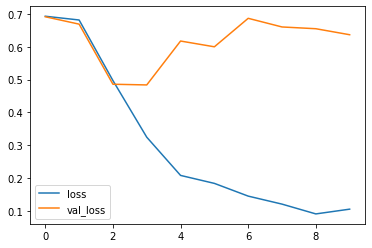

In [21]:
dr.loc[:, ['loss', 'val_loss']].plot()

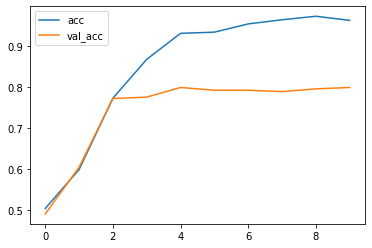

In [22]:
dr.loc[:, ['acc', 'val_acc']].plot()

In [23]:
y_pred = _model.predict_classes(x_test)
y_pred[:5]

array([[1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

Accuracy :  0.7993311036789298
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       155
           1       0.82      0.74      0.78       144

    accuracy                           0.80       299
   macro avg       0.80      0.80      0.80       299
weighted avg       0.80      0.80      0.80       299



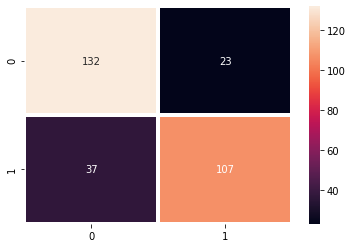

In [24]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, lw=3, fmt='d')

print("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))